In [1]:
from sympy import sqrt, symbols, Eq, init_printing, cos, pi, solveset, S
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

init_printing()

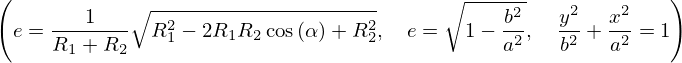

In [306]:
R1, R2, e, a, b, alpha = symbols("R1, R2, e, a, b, alpha")

eq_e1 = Eq(e, sqrt(R1**2 + R2**2 - 2*R1*R2*cos(alpha))/(R1+R2))
eq_e2 = Eq(e, sqrt(1-b**2/a**2))

x, y = symbols("x, y")
eq_ells = Eq((x/a)**2+(y/b)**2, 1)
eq_ells

eq_e1, eq_e2, eq_ells

In [312]:
f1 = 15.96
f2 = 6.29
angle = pi/2
dia = 5.28

temp_a = float((f1+f2)/2)
temp_e = float(eq_e1.subs({R1:f1, R2:f2, alpha:angle}).evalf().rhs)
temp_b = float(solveset(eq_e2.subs({a:(f1+f2)/2, e:temp_e}), b).args[-1])

temp_A0 = 2*temp_e*temp_a
temp_a, temp_e, temp_b, temp_A0

In [317]:
temp_A0/2, temp_A0, np.sqrt(f1**2+f2**2)

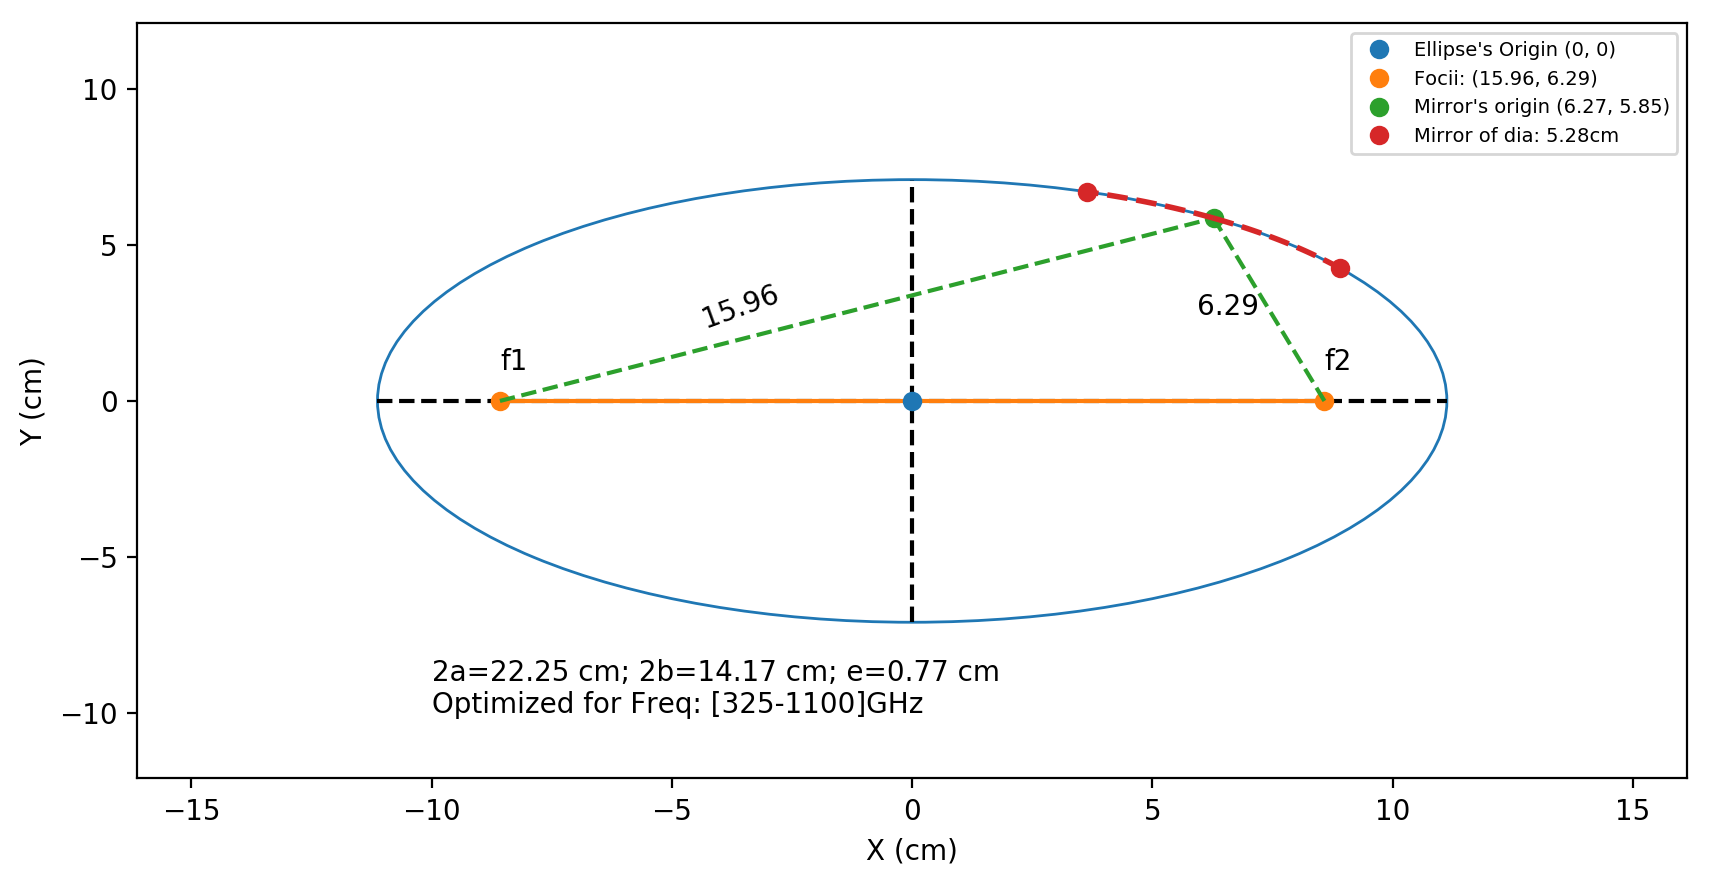

In [343]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)

###########################################################################################################
# Defining ellipse
w, h = 2 * temp_a, 2 * temp_b
origin = 0
angle = 0

ells = Ellipse(
    xy=[origin, origin],
    width=w,
    height=h,
    angle=angle,
    edgecolor="C0",
    lw=1,
    facecolor="none",
)

ax.add_artist(ells)
ax.plot(origin, origin, "o", label=f"Ellipse's Origin (0, 0)")

extra_space = 5
ax.set(
    xlim=[origin - w / 2 - extra_space, origin + w / 2 + extra_space],
    ylim=[origin - h / 2 - extra_space, origin + h / 2 + extra_space],
    xlabel="X (cm)",
    ylabel="Y (cm)",
)

ax.hlines(0, xmin=origin - w / 2, xmax=origin + w / 2, linestyles="--")
ax.vlines(0, ymin=origin - h / 2, ymax=origin + h / 2, linestyles="--")

###########################################################################################################

###########################################################################################################
# Distance b/w focii (A0)
ax.hlines(0, xmin=-temp_A0 / 2, xmax=temp_A0 / 2, edgecolor="C1")
ax.plot([-temp_A0 / 2, temp_A0 / 2], [0, 0], "o", label=f"Focii: ({f1}, {f2})")
ax.annotate(f"f1", xy=(-temp_A0 / 2, 0), xytext=(-temp_A0 / 2, 1))
ax.annotate(f"f2", xy=(temp_A0 / 2, 0), xytext=(temp_A0 / 2, 1))

###########################################################################################################

###########################################################################################################
# Mirror Portion with beams from focii
temp_x = (f1 ** 2 - f2 ** 2) / (2 * temp_A0)
temp_y = np.sqrt(f1 ** 2 - (temp_x + temp_A0 / 2) ** 2)
ax.plot(temp_x, temp_y, "oC2", label=f"Mirror's origin ({temp_x:.2f}, {temp_y:.2f})")

ax.plot([-temp_A0 / 2, temp_x], [0, temp_y], "--C2")
ax.plot([temp_A0 / 2, temp_x], [0, temp_y], "--C2")

ax.annotate(
    f"{f1}",
    xy=(-temp_A0 / 2, 0),
    xytext=(-temp_A0 / 2 + 5, 3),
    rotation=20,
    ha="center",
    va="center",
)
ax.annotate(
    f"{f2}",
    xy=(temp_A0 / 2, 0),
    xytext=(temp_A0 / 2 - 2, 3),
    rotation=0,
    ha="center",
    va="center",
)
###########################################################################################################

###########################################################################################################
# Mirror portion (with diameter dia)
temp_x2 = np.linspace(temp_x, temp_x + dia / 2)
temp_y2 = np.array(
    [
        float(solveset(eq_ells.subs({x: i, a: temp_a, b: temp_b}), y).args[-1])
        for i in temp_x2
    ]
)

temp_x3 = np.linspace(temp_x, temp_x - dia / 2)
temp_y3 = np.array(
    [
        float(solveset(eq_ells.subs({x: i, a: temp_a, b: temp_b}), y).args[-1])
        for i in temp_x3
    ]
)

ax.plot(temp_x2, temp_y2, "--C3", lw=2)
ax.plot(temp_x3, temp_y3, "--C3", lw=2)
ax.plot(
    [temp_x + dia / 2, temp_x - dia / 2],
    [temp_y2[-1], temp_y3[-1]],
    "oC3",
    lw=2,
    label=f"Mirror of dia: {dia}cm",
)

###########################################################################################################

ax.text(-10, -10, f"2a={w:.2f} cm; 2b={h:.2f} cm; e={temp_e:.2f} cm\nOptimized for Freq: [325-1100]GHz")

# ax.grid()
ax.legend(fontsize=7)
plt.show()

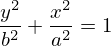

In [300]:
temp_x2 = np.linspace(temp_x, temp_x+dia/2)
temp_y2 = np.array([float(solveset(eq_ells.subs({x:i, a:temp_a, b:temp_b}), y).args[-1]) for i in temp_x2])
temp_y2

array([5.85192771, 5.82836414, 5.8045021 , 5.78033789, 5.75586772,
       5.73108766, 5.70599368, 5.68058161, 5.65484717, 5.62878593,
       5.60239333, 5.57566468, 5.54859511, 5.5211796 , 5.49341299,
       5.46528991, 5.43680483, 5.40795205, 5.37872563, 5.34911945,
       5.31912718, 5.28874224, 5.25795782, 5.22676688, 5.19516207,
       5.16313582, 5.13068022, 5.09778707, 5.06444785, 5.03065369,
       4.99639535, 4.96166323, 4.9264473 , 4.89073711, 4.85452175,
       4.81778984, 4.78052946, 4.74272816, 4.7043729 , 4.66545001,
       4.62594518, 4.58584335, 4.54512874, 4.50378471, 4.46179377,
       4.41913749, 4.37579639, 4.33174994, 4.28697638, 4.24145269])

In [282]:
temp_x

In [299]:
np.linspace(0, 10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [286]:
for i in temp_x2:
    temp = float(solveset(eq_ells.subs({x:i, a:temp_a, b:temp_b}), y).args[-1])
    print(temp, type(temp))

5.851927713521791 <class 'float'>
5.883856228705188 <class 'float'>
5.9152359344469225 <class 'float'>
5.9460755195828385 <class 'float'>
5.976383345578102 <class 'float'>
6.006167462395231 <class 'float'>
6.0354356233562685 <class 'float'>
6.064195299075665 <class 'float'>
6.092453690533541 <class 'float'>
6.120217741352917 <class 'float'>
6.147494149338986 <class 'float'>
6.174289377333554 <class 'float'>
6.200609663433243 <class 'float'>
6.226461030616052 <class 'float'>
6.251849295817178 <class 'float'>
6.27678007849168 <class 'float'>
6.301258808698556 <class 'float'>
6.325290734738057 <class 'float'>
6.348880930371582 <class 'float'>
6.372034301651206 <class 'float'>
6.394755593383853 <class 'float'>
6.417049395253197 <class 'float'>
6.438920147620686 <class 'float'>
6.46037214702548 <class 'float'>
6.481409551401646 <class 'float'>
6.502036385029632 <class 'float'>
6.522256543237836 <class 'float'>
6.542073796868937 <class 'float'>
6.561491796524659 <class 'float'>
6.58051407660

In [288]:
temp = np.array([float(solveset(eq_ells.subs({x:i, a:temp_a, b:temp_b}), y).args[-1]) for i in temp_x2])
temp

array([5.85192771, 5.88385623, 5.91523593, 5.94607552, 5.97638335,
       6.00616746, 6.03543562, 6.0641953 , 6.09245369, 6.12021774,
       6.14749415, 6.17428938, 6.20060966, 6.22646103, 6.2518493 ,
       6.27678008, 6.30125881, 6.32529073, 6.34888093, 6.3720343 ,
       6.39475559, 6.4170494 , 6.43892015, 6.46037215, 6.48140955,
       6.50203639, 6.52225654, 6.5420738 , 6.5614918 , 6.58051408,
       6.59914406, 6.61738506, 6.63524028, 6.65271283, 6.66980572,
       6.68652186, 6.70286407, 6.71883507, 6.73443751, 6.74967394,
       6.76454684, 6.7790586 , 6.79321153, 6.80700787, 6.82044979,
       6.83353938, 6.84627865, 6.85866957, 6.87071401, 6.88241379])